<a href="https://colab.research.google.com/github/changsksu/IMSE_Data_Science/blob/main/Neural_Net_for_Number_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This code will train a neural network to recognize hand-written numbers from 0 to 9.
Data set ref: https://www.kaggle.com/competitions/digit-recognizer/data
Algorithm Ref. https://medium.com/international-school-of-ai-data-science/diy-neural-networks-just-math-and-feelings-2c23bfa2e6bf
Cod Ref. https://www.kaggle.com/code/wwsalmon/simple-mnist-nn-from-scratch-numpy-no-tf-keras/notebook

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# import training data
# if the following github link is no longer work, a local file train.csv is still available
data= pd.read_csv('https://raw.githubusercontent.com/wehrley/Kaggle-Digit-Recognizer/master/train.csv')


In [ ]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data = np.array(data) # change to a numpi array
m, n = data.shape     # define m and n as the array dimensions
np.random.shuffle(data)  # ???

data_dev = data[0:1000].T   #transpose of training
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [ ]:
Y_train

array([7, 3, 1, ..., 4, 5, 8])

In [ ]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2


In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[1 1 1 ... 1 6 1] [7 3 1 ... 4 5 8]
0.116
Iteration:  10
[7 3 8 ... 8 6 3] [7 3 1 ... 4 5 8]
0.16631707317073172
Iteration:  20
[0 3 1 ... 8 6 3] [7 3 1 ... 4 5 8]
0.25797560975609757
Iteration:  30
[0 3 1 ... 1 6 3] [7 3 1 ... 4 5 8]
0.33358536585365856
Iteration:  40
[0 3 1 ... 1 6 3] [7 3 1 ... 4 5 8]
0.39846341463414636
Iteration:  50
[0 8 1 ... 1 1 8] [7 3 1 ... 4 5 8]
0.44782926829268294
Iteration:  60
[0 8 1 ... 1 1 8] [7 3 1 ... 4 5 8]
0.49129268292682926
Iteration:  70
[0 8 1 ... 1 1 8] [7 3 1 ... 4 5 8]
0.5275609756097561
Iteration:  80
[0 3 1 ... 1 1 8] [7 3 1 ... 4 5 8]
0.5633170731707317
Iteration:  90
[0 3 1 ... 1 1 8] [7 3 1 ... 4 5 8]
0.598
Iteration:  100
[0 3 1 ... 8 1 8] [7 3 1 ... 4 5 8]
0.6296585365853659
Iteration:  110
[0 3 1 ... 8 1 8] [7 3 1 ... 4 5 8]
0.6574634146341464
Iteration:  120
[0 3 1 ... 8 1 8] [7 3 1 ... 4 5 8]
0.6811951219512196
Iteration:  130
[0 3 1 ... 8 1 8] [7 3 1 ... 4 5 8]
0.7007317073170731
Iteration:  140
[0 3 1 ... 8 1 8] [7 

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7


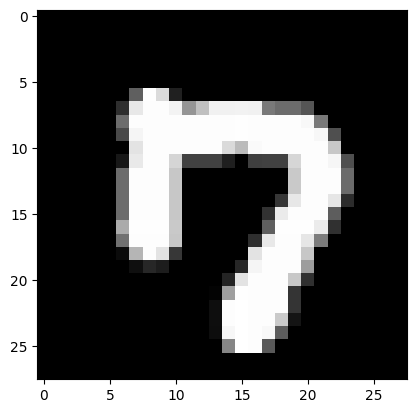

Prediction:  [3]
Label:  3


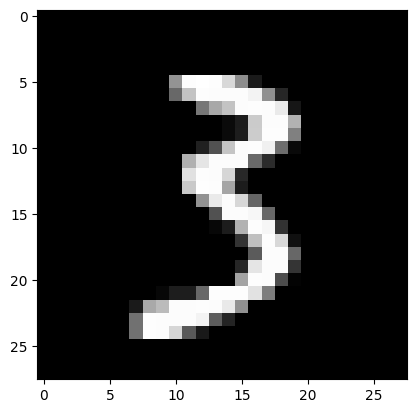

Prediction:  [1]
Label:  1


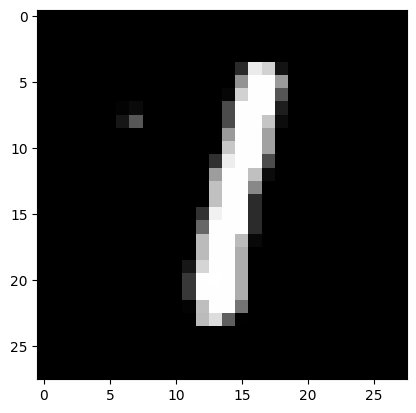

Prediction:  [1]
Label:  1


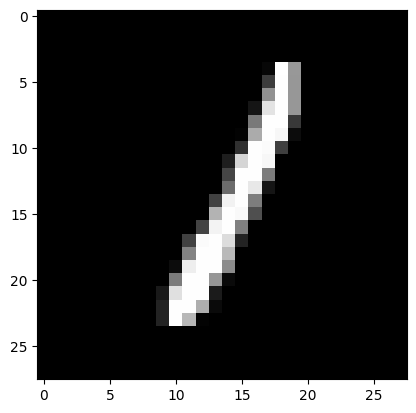

In [ ]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)